# Additional Regression Plots

In [1]:
# Importing intrinsic libraries

import numpy as np
import pandas as pd
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:

# Let us also get tableau colors we defined earlier:
tableau_20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scaling avove RGB values to [0, 1] range, which is Matplotlib acceptable format:
for i in range(len(tableau_20)):
    r, g, b = tableau_20[i]
    tableau_20[i] = (r / 255., g / 255., b / 255.)

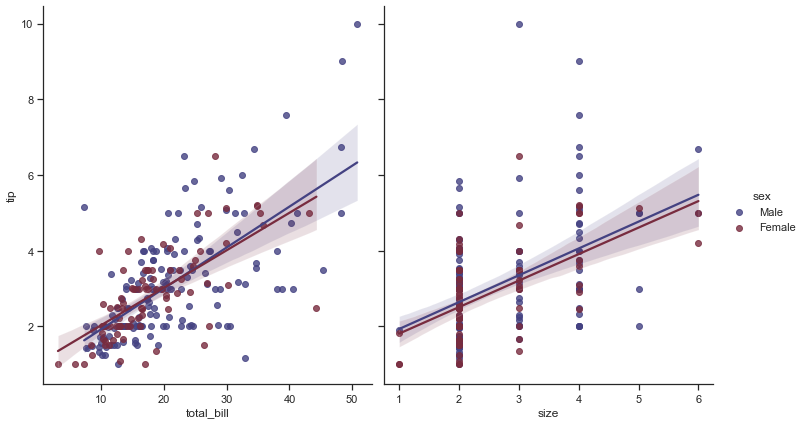

In [4]:
# Loading Built-in Dataset:
tips = sns.load_dataset("tips")
# tips.head(2)

# Plotting a simple Jointplot:
sns.pairplot(data=tips, hue="sex", palette="icefire", x_vars=["total_bill", "size"], y_vars=["tip"], size=6, aspect=.85, kind="reg")

 **Pairplot**  *parameters* :

**`sns.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)`**

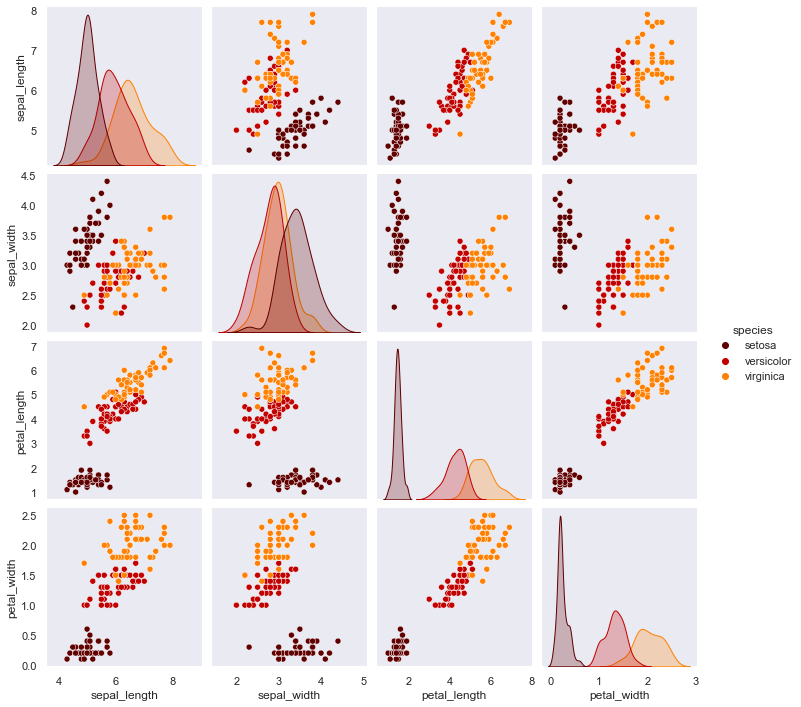

In [5]:
iris = sns.load_dataset("iris")
# iris.columns
sns.set(style="dark")

sns.pairplot(iris, hue="species", palette="gist_heat", dropna=True)

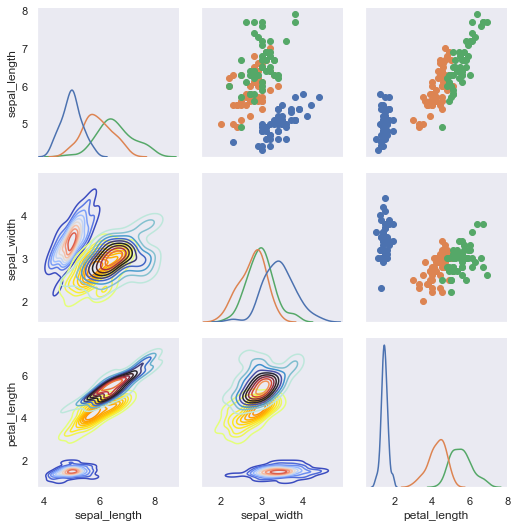

In [6]:
from itertools import cycle
sns.set(style="dark")

def make_kde(*args, **kwargs):    
    sns.kdeplot(*args, cmap=next(make_kde.cmap_cycle), **kwargs)

make_kde.cmap_cycle = cycle(('coolwarm', 'Wistia', 'icefire'))

our_plot = sns.PairGrid(iris, vars=('sepal_length', 'sepal_width', 'petal_length'), hue='species', dropna=True)
our_plot.map_diag(sns.kdeplot)
our_plot.map_lower(make_kde)
our_plot.map_upper(plt.scatter)

## `Residplot()`

In [7]:
def generatingData():
    num_points =1500
    category_points =[]
    
    for i in range(num_points):
        if np.random.random()>0.5:
            x,y = np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)
            category_points.append([x,y])
        else:
            x, y = np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)
            category_points.append([x, y])
            
    df =pd.DataFrame({'x':[v[0] for v in category_points], 'y':
                      [v[1] for v in category_points]})
    
    sns.residplot('x', 'y', data=df, lowess=True, color="r")
    plt.show()

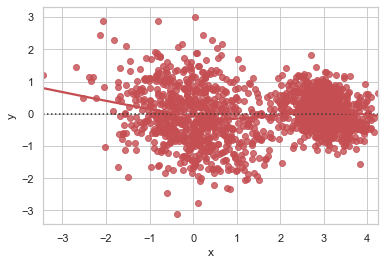

In [8]:
sns.set(style="whitegrid")

generatingData()

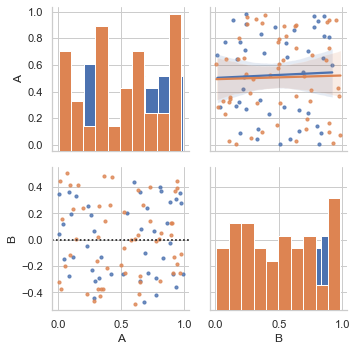

In [9]:
np.random.seed(42)

sample = 100
categories = pd.DataFrame(np.array(["p","q"])[np.random.randint(0,2,size=[sample,1])], columns=["cat"], dtype="object")
data = pd.DataFrame(np.random.rand(sample, 2), columns=list('AB'))
df = pd.concat([data,categories], axis=1)

g = sns.PairGrid(df, hue="cat")
g.map_diag(plt.hist)

g.map_upper(sns.regplot, scatter_kws={'s':10})

def f(*args, **kwargs): 
    if 'scatter_kws' in kwargs.keys():
        kwargs['scatter_kws'].update({"color": kwargs.pop("color")})
    sns.residplot(*args,**kwargs)
g.map_lower(f, scatter_kws={'s':10})

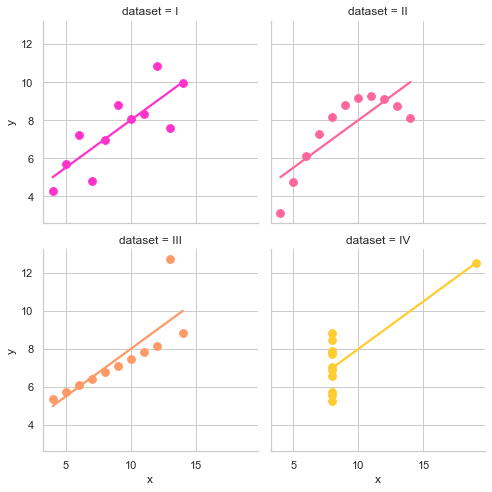

In [10]:
df = sns.load_dataset("anscombe")

sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df, col_wrap=2, ci=None, palette="spring", size=3.5, scatter_kws={"s": 60, "alpha": 1})